In [3]:
import geopandas as gpd
import numpy as np
import pandas as pd
from shapely.geometry import Point

import missingno as msn

import seaborn as sns
import matplotlib.pyplot as plt


from datetime import datetime
import pylab as pl
import os
from IPython import display
from subprocess import call
import subprocess
import sys
sys.path.append(r'C:\Users\Patrick\Documents\GitHub\PatchSim')
import patchsim as sim
import matplotlib.ticker as plticker
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

from PIL import Image
import io

from pandas.tools.plotting import table

%matplotlib inline


### Setting up variables

In [4]:
stages = 6
sc = 'a' # sc='a' for baseline, sc='b' for pull-out

for s in range(stages):
    if s!=3:
        sim.run_disease_simulation(sim.read_config('../data/patchsim/cfg_stage{}.txt'.format(s)),write_epi=True)
    else:
        sim.run_disease_simulation(sim.read_config('../data/patchsim/cfg_stage{}{}.txt'.format(s,sc)),write_epi=True)

out_df = pd.DataFrame()
for s in range(stages):
    if s!=3:
        temp_df = pd.read_csv('../outputs/sample{}.out'.format(s),delimiter=' ',header=None,index_col=0)
    else:
        temp_df = pd.read_csv('../outputs/sample{}{}.out'.format(s,sc),delimiter=' ',header=None,index_col=0)
        
    if s==0:
        out_df = temp_df.copy(deep=True)
    else:
        temp_df.columns = [x+len(out_df.columns) for x in temp_df.columns]
        out_df = out_df.join(temp_df)

In [5]:
evd_df2 = pd.read_csv(r'C:\Users\Patrick\Ebola Project\Ebola_Updated.csv', delimiter='\t')
evd_df2['Date'] = evd_df2.date.apply(lambda x: datetime.strptime(str(x),'%Y%m%d'))
gt2 = evd_df2[evd_df2.health_zone=='all'].total_c.values


In [6]:
project = out_df.iloc[:,180:210].T
project = project.reset_index()
project.drop(['index'], inplace=True, axis=1, errors='ignore')
project.head()

,ADI,ADJA,ALIMBONGO,ANGUMU,ARIWARA,ARU,AUNGBA,BAMBO,BAMBU-MINES,BENI,...,OICHA,PINGA,RETHY,RIMBA,RUTSHURU,RWAMPARA,RWANGUBA,TCHOMIA,VUHOVI,WALIKALE
0,0.018606,0.014639,0.094436,0.027191,0.022344,0.024677,0.022978,0.023956,0.024277,0.049638,...,0.141649,0.042809,0.020782,0.031254,0.032204,0.027346,0.028836,0.028203,0.142551,0.025728
1,0.018635,0.014663,0.094478,0.027197,0.022384,0.024700,0.022994,0.024001,0.024285,0.048765,...,0.139027,0.042832,0.020833,0.031270,0.032302,0.027326,0.028927,0.028189,0.142766,0.025762
2,0.018664,0.014686,0.094521,0.027202,0.022425,0.024722,0.023010,0.024046,0.024293,0.047946,...,0.136484,0.042855,0.020883,0.031286,0.032399,0.027305,0.029017,0.028175,0.142981,0.025797
3,0.018692,0.014710,0.094563,0.027207,0.022464,0.024743,0.023026,0.024091,0.024299,0.047178,...,0.134020,0.042878,0.020931,0.031301,0.032495,0.027285,0.029106,0.028160,0.143195,0.025831
4,0.018719,0.014732,0.094605,0.027212,0.022503,0.024764,0.023041,0.024135,0.024305,0.046459,...,0.131634,0.042901,0.020979,0.031315,0.032589,0.027264,0.029194,0.028147,0.143409,0.025864


In [7]:
p=project.sum().reset_index(name='total_c_projected')
p = p.rename(columns={0: 'health_zone'})

p.head()

,health_zone,total_c_projected
0,ADI,0.569423
1,ADJA,0.448288
2,ALIMBONGO,2.853210
3,ANGUMU,0.817496
4,ARIWARA,0.685853


In [8]:
p = p.sort_values(by = ['total_c_projected'], ascending = [False])
p.reset_index(inplace=True)
p.drop(['index', 'MyIdx', 'level_0'], inplace=True, axis=1, errors='ignore')
p.index = np.arange(1, len(p) + 1)
p.head()

,health_zone,total_c_projected
1,KATWA,49.310896
2,BUTEMBO,12.170757
3,MUSIENENE,5.143680
4,KYONDO,5.128022
5,LUBERO,4.871107


In [10]:
p

,health_zone,total_c_projected
1,KATWA,49.310896
2,BUTEMBO,12.170757
3,MUSIENENE,5.143680
4,KYONDO,5.128022
5,LUBERO,4.871107
6,VUHOVI,4.370704
7,MUTWANGA,4.305806
8,MASEREKA,4.238098
9,KAYNA,3.493965
10,OICHA,3.393409


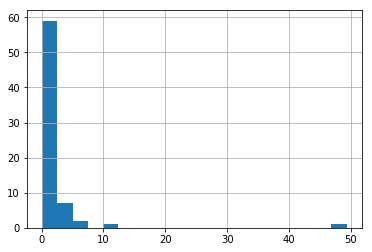

In [11]:
p.total_c_projected.hist(bins=20)

In [ ]:
### Table with the percent of total cases in comparison to rest of North Kivu 

In [29]:
#total of all in north kivu 
t=p['total_c_projected'].sum()
t

158.04421275311324

In [30]:
p['%of_NK_total_c_projected']= (p['total_c_projected']/t)*100

p_10=p.loc[0:10]

p_10

,health_zone,total_c_projected,%of_NK_total_c_projected
1,KATWA,49.310896,31.200697
2,BUTEMBO,12.170757,7.700856
3,MUSIENENE,5.143680,3.254583
4,KYONDO,5.128022,3.244675
5,LUBERO,4.871107,3.082117
6,VUHOVI,4.370704,2.765495
7,MUTWANGA,4.305806,2.724431
8,MASEREKA,4.238098,2.681590
9,KAYNA,3.493965,2.210751
10,OICHA,3.393409,2.147126


### Table of percent compared to the other top ten

In [46]:
t_top10=p_10['total_c_projected'].sum()
t_top10

96.42644411697984

In [43]:
p['%of_top10_total_c_projected']=(p['total_c_projected']/t_top10)*100
p_10=p.loc[0:10]
p_10


,health_zone,total_c_projected,%of_NK_total_c_projected,%of_top10_total_c_projected
1,KATWA,49.310896,31.200697,51.138354
2,BUTEMBO,12.170757,7.700856,12.621804
3,MUSIENENE,5.143680,3.254583,5.334304
4,KYONDO,5.128022,3.244675,5.318066
5,LUBERO,4.871107,3.082117,5.051630
6,VUHOVI,4.370704,2.765495,4.532682
7,MUTWANGA,4.305806,2.724431,4.465379
8,MASEREKA,4.238098,2.681590,4.395162
9,KAYNA,3.493965,2.210751,3.623451
10,OICHA,3.393409,2.147126,3.519168


In [60]:
print(project['MABALAKO'].sum()/t)
print(project['BENI'].sum()/t)
print(project['BUTEMBO'].sum()/t)
print(project['KATWA'].sum()/t)
print(project['KALUNGUTA'].sum()/t)
print(project['OICHA'].sum()/t)

0.01565797152885369
0.008004914130668922
0.07700855678689052
0.3120069733476241
0.0048411552846951205
0.021471262085049347


In [44]:

p_10

,health_zone,total_c_projected,%of_NK_total_c_projected,%of_top10_total_c_projected
1,KATWA,49.310896,31.200697,51.138354
2,BUTEMBO,12.170757,7.700856,12.621804
3,MUSIENENE,5.143680,3.254583,5.334304
4,KYONDO,5.128022,3.244675,5.318066
5,LUBERO,4.871107,3.082117,5.051630
6,VUHOVI,4.370704,2.765495,4.532682
7,MUTWANGA,4.305806,2.724431,4.465379
8,MASEREKA,4.238098,2.681590,4.395162
9,KAYNA,3.493965,2.210751,3.623451
10,OICHA,3.393409,2.147126,3.519168


#### Saving to csv

In [47]:
p_10.to_csv('projection_top10_table.csv', sep='\t')

### Nex: creating the specific data set of six Table

In [48]:
#creating the variables 
mabalako= project['MABALAKO'].sum()
beni= project['BENI'].sum()
butembo= project['BUTEMBO'].sum()
katwa = project['KATWA'].sum()
kalungata= project['KALUNGUTA'].sum()
oicha = project['OICHA'].sum()

In [49]:
print(mabalako)
print(beni)
print(butembo)
print(katwa)
print(kalungata)
print(oicha)

2.4746517835883424
1.2651303519378416
12.170756732637528
49.310896476206835
0.7651165757852141
3.3934087130473927


In [50]:
#The total sum of the projected cases over the next 30 days
t_six= project['MABALAKO'].sum() + project['BENI'].sum() + project['BUTEMBO'].sum() + project['KATWA'].sum() + project['KALUNGUTA'].sum() + project['OICHA'].sum()
#mabalako + beni + butembo + katwa + kalungata + oicha 
t_six

69.37996063320315

In [53]:
perc_mabalako=(project['MABALAKO'].sum()/t_six)*100
perc_beni=(project['BENI'].sum()/t_six)*100
perc_butembo=(project['BUTEMBO'].sum()/t_six)*100
perc_katwa=(project['KATWA'].sum()/t_six)*100
perc_kalungata=(project['KALUNGUTA'].sum()/t_six)*100
perc_oicha=(project['OICHA'].sum()/t_six)*100

In [57]:
projected_df= {
    'North Kivu Health Zones': ['MABALAKO','BENI','BUTEMBO','KATWA','KALUNGUTA','OICHA'],
    'projected': [mabalako, beni, butembo, katwa, kalungata, oicha],
    '% Projected': [perc_mabalako, perc_beni, perc_butembo, perc_katwa, perc_kalungata, perc_oicha]
}
p_df= pd.DataFrame(projected_df)
p_df


,% Projected,North Kivu Health Zones,projected
0,3.566811,MABALAKO,2.474652
1,1.823481,BENI,1.265130
2,17.542179,BUTEMBO,12.170757
3,71.073688,KATWA,49.310896
4,1.102792,KALUNGUTA,0.765117
5,4.891050,OICHA,3.393409


In [58]:
p_df = p_df[['North Kivu Health Zones', 'projected', '% Projected']]
p_df

,North Kivu Health Zones,projected,% Projected
0,MABALAKO,2.474652,3.566811
1,BENI,1.265130,1.823481
2,BUTEMBO,12.170757,17.542179
3,KATWA,49.310896,71.073688
4,KALUNGUTA,0.765117,1.102792
5,OICHA,3.393409,4.891050


### Saving Data set 

In [59]:
p_df.to_csv('projection_six_table.csv', sep='\t')